Based on [kaggles_notebook](https://www.kaggle.com/devm2024/keras-model-for-beginners-0-210-on-lb-eda-r-d)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))


# Any results you write to the current directory are saved as output.

test.json
train.json



This kernel is specifically is for Beginners who want's to experiment building CNN using Keras. By using this kernel, you can expect to get good score and also learn keras. Keras is simple frameworks where we can initialize the model and keep stacking the layers we want. It makes building deep neural networks very easy.

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from os.path import join as opj
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab
plt.rcParams['figure.figsize'] = 10, 10
%matplotlib inline

In [3]:
#Load the data.
train = pd.read_json("../input/train.json")

In [4]:
test = pd.read_json("../input/test.json")

In [5]:
train.shape, test.shape

((1604, 5), (8424, 4))

In [6]:
train.head()

,band_1,band_2,id,inc_angle,is_iceberg
0,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",dfd5f913,43.9239,0
1,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",e25388fd,38.1562,0
2,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",58b2aaa0,45.2859,1
3,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",4cfc3a18,43.8306,0
4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",271f93f4,35.6256,0


In [7]:
test.head()

,band_1,band_2,id,inc_angle
0,"[-15.863251, -15.201077, -17.887735, -19.17248...","[-21.629612, -21.142353, -23.908337, -28.34524...",5941774d,34.966400
1,"[-26.058969497680664, -26.058969497680664, -26...","[-25.754207611083984, -25.754207611083984, -25...",4023181e,32.615072
2,"[-14.14109992980957, -15.064241409301758, -17....","[-14.74563980102539, -14.590410232543945, -14....",b20200e4,37.505433
3,"[-12.167478, -13.706167, -16.54837, -13.572674...","[-24.32222, -26.375538, -24.096739, -23.8769, ...",e7f018bb,34.473900
4,"[-23.37459373474121, -26.02718162536621, -28.1...","[-25.72234344482422, -27.011577606201172, -23....",4371c8c3,43.918874


(array([ 133.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           1.,    0.,    0.,    0.,    0.,    0.,    7.,   25.,   31.,
          81.,    0.,  114.,   94.,   94.,   82.,  162.,  140.,   97.,
         101.,  128.,  158.,   61.,   95.]),
 array([ -1.  ,  -0.08,   0.84,   1.76,   2.68,   3.6 ,   4.52,   5.44,
          6.36,   7.28,   8.2 ,   9.12,  10.04,  10.96,  11.88,  12.8 ,
         13.72,  14.64,  15.56,  16.48,  17.4 ,  18.32,  19.24,  20.16,
         21.08,  22.  ,  22.92,  23.84,  24.76,  25.68,  26.6 ,  27.52,
         28.44,  29.36,  30.28,  31.2 ,  32.12,  33.04,  33.96,  34.88,
         35.8 ,  36.72,  37.64,  38.56,  39.48,  40.4 ,  41.32,  42.24,
         43.16,  44.08,  45.  ]),
 <a list of 50 Patch objects>)

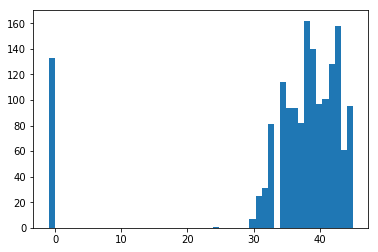

In [8]:
from collections import Counter
counter = Counter(train['inc_angle'].map(lambda x: int(x) if x != 'na' else -1))
plt.hist(list(counter.elements()), bins=50)

(array([   1.,    0.,    0.,    0.,    0.,    0.,   34.,   83.,  156.,
         364.,  538.,  470.,  994.,  673.,  716.,  606.,  677.,  636.,
         751.,  589.,  601.,  300.,  160.,   60.,   15.]),
 array([ 23.  ,  24.08,  25.16,  26.24,  27.32,  28.4 ,  29.48,  30.56,
         31.64,  32.72,  33.8 ,  34.88,  35.96,  37.04,  38.12,  39.2 ,
         40.28,  41.36,  42.44,  43.52,  44.6 ,  45.68,  46.76,  47.84,
         48.92,  50.  ]),
 <a list of 25 Patch objects>)

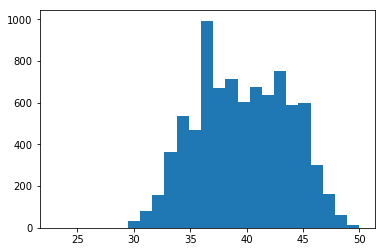

In [9]:
counter = Counter(test['inc_angle'].map(lambda x: int(x) if x != 'na' else -1))
plt.hist(list(counter.elements()), bins=25)

In [10]:
test['inc_angle'].mean(), test['inc_angle'].std()

(40.153403156922934, 4.10838623487953)

In [31]:
angl = train['inc_angle']
angl = angl[angl != 'na']
angl.mean(), angl.std(), angl.min(), angl.max()

(39.268707477906183, 3.8397444116664374, 24.7546, 45.9375)

In [12]:
angl = angl.append(test['inc_angle'])
angl.mean(), angl.std()

(40.021883465782651, 4.0815391476694414)

In [19]:
#Generate the training data
#Create 3 bands having HH, HV and avg of both
X_band_1=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_1"]])
X_band_2=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_2"]])
X_band_3=(X_band_1+X_band_2)
X_train = np.concatenate([X_band_1[:, :, :, np.newaxis], 
                          X_band_2[:, :, :, np.newaxis],
                          X_band_3[:, :, :, np.newaxis]], axis=-1)
X_train.shape

(1604, 75, 75, 3)

In [24]:
X_band_1_test=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in test["band_1"]])
X_band_2_test=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in test["band_2"]])
X_band_3_test=(X_band_1_test+X_band_2_test)
X_test = np.concatenate([X_band_1_test[:, :, :, np.newaxis], 
                         X_band_2_test[:, :, :, np.newaxis],
                        X_band_3_test[:, :, :, np.newaxis]], axis=-1)
X_test.shape

(8424, 75, 75, 3)

In [27]:
t = np.append(X_band_1, X_band_1_test)
t.mean(), t.std(), t.min(), t.max()

(-22.159262, 5.33146, -45.680546, 37.090523)

In [28]:
t = np.append(X_band_2, X_band_2_test)
t.mean(), t.std(), t.min(), t.max()

(-24.953745, 4.5463958, -49.0835, 37.090523)

In [29]:
t = np.append(X_band_3, X_band_3_test)
t.mean(), t.std(), t.min(), t.max()

(-47.113068, 8.857996, -86.613548, 70.606689)

In [ ]:
plt.hist(train['is_iceberg'])

In [ ]:
#Import Keras.
from matplotlib import pyplot
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, Activation
from keras.layers import GlobalMaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.merge import Concatenate
from keras.models import Model
from keras import initializers
from keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping

In [ ]:
#define our model
def getModel():
    #Building the model
    gmodel=Sequential()
    #Conv Layer 1
    gmodel.add(Conv2D(64, kernel_size=(3, 3),activation='relu', input_shape=(75, 75, 3)))
    gmodel.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    gmodel.add(Dropout(0.2))

    #Conv Layer 2
    gmodel.add(Conv2D(128, kernel_size=(3, 3), activation='relu' ))
    gmodel.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    gmodel.add(Dropout(0.2))

    #Conv Layer 3
    gmodel.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    gmodel.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    gmodel.add(Dropout(0.2))

    #Conv Layer 4
    gmodel.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    gmodel.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    gmodel.add(Dropout(0.2))

    #Flatten the data for upcoming dense layers
    gmodel.add(Flatten())

    #Dense Layers
    gmodel.add(Dense(512))
    gmodel.add(Activation('relu'))
    gmodel.add(Dropout(0.2))

    #Dense Layer 2
    gmodel.add(Dense(256))
    gmodel.add(Activation('relu'))
    gmodel.add(Dropout(0.2))

    #Sigmoid Layer
    gmodel.add(Dense(1))
    gmodel.add(Activation('sigmoid'))

    mypotim=SGD(lr=0.0005, momentum=0.9)
    gmodel.compile(loss='binary_crossentropy',
                  optimizer=mypotim,
                  metrics=['accuracy'])
    gmodel.summary()
    return gmodel


def get_callbacks(filepath, patience=10):
    es = EarlyStopping('val_loss', patience=patience, mode="min")
    msave = ModelCheckpoint(filepath, save_best_only=True)
    return [es, msave]
file_path = ".model_weights.hdf5"
callbacks = get_callbacks(filepath=file_path, patience=5)

In [ ]:
target_train=train['is_iceberg']
X_train_cv, X_valid, y_train_cv, y_valid = train_test_split(X_train, target_train, random_state=1, train_size=0.75)

In [ ]:
#Without denoising, core features.
import os

gmodel=getModel()
gmodel.fit(X_train_cv, y_train_cv,
          batch_size=2048,
          epochs=100,
          verbose=1,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

In [ ]:
gmodel.load_weights(filepath=file_path)
score = gmodel.evaluate(X_valid, y_valid, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
X_band_test_1=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in test["band_1"]])
X_band_test_2=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in test["band_2"]])
X_test = np.concatenate([X_band_test_1[:, :, :, np.newaxis]
                          , X_band_test_2[:, :, :, np.newaxis]
                         , ((X_band_test_1+X_band_test_2)/2)[:, :, :, np.newaxis]], axis=-1)
#predicted_test=gmodel.predict_proba(X_test)

In [ ]:
submission = pd.DataFrame()
submission['id']=test['id']
submission['is_iceberg']=predicted_test.reshape((predicted_test.shape[0]))
submission.to_csv('../sub.csv', index=False)

In [ ]:
band_1 = np.concatenate([X_band_1, X_band_test_1], axis=0)
band_1.mean(), band_1.std(), band_1.min(), band_1.max()

In [ ]:
band_2 = np.concatenate([X_band_2, X_band_test_2], axis=0)
band_2.mean(), band_2.std(), band_2.min(), band_2.max()